# Lab 4: Analyzing Preliminary Data

In [1]:
import numpy as np
import ugradio
import matplotlib.pyplot as plt
import pyfits

## Test: Galactic Coordinate (120, 0)

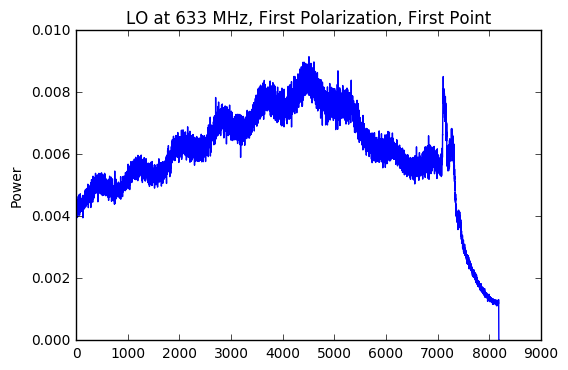

In [37]:
LO_633 = pyfits.open('LO633-4-15.fits')
LO_633_0 = LO_633[1].data['auto0_real']

plt.plot(LO_633_0)
plt.title('LO at 633 MHz, First Polarization, First Point')
plt.ylabel('Power')
plt.show()

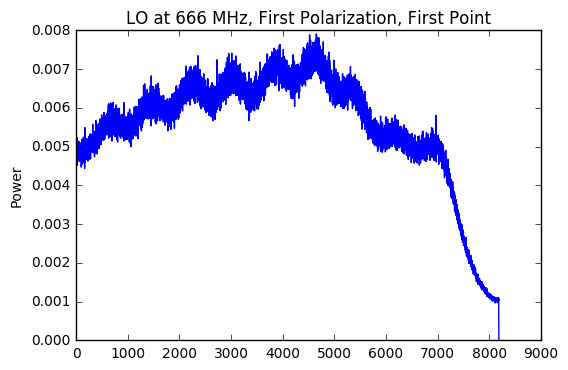

In [38]:
LO_666 = pyfits.open('LO666-4-15.fits')
LO_666_0 = LO_666[1].data['auto0_real']

plt.plot(LO_666_0)
plt.title('LO at 666 MHz, First Polarization, First Point')
plt.ylabel('Power')
plt.show()

In [2]:
def avg_spectrum(fits):
    """Takes in a fits file of power spectra and averages over all spectra using both polarization modes.
    
    Parameters
    ----------
    fits: fits file pre-loaded
    
    Returns
    -------
    avg_power : average power spectrum"""
    
    power_1 = []
    power_2 = []
    
    for i in range(len(fits)-1):
        pol_1 = fits[i+1].data['auto0_real']
        pol_2 = fits[i+1].data['auto1_real']
        power_1.append(pol_1)
        power_2.append(pol_2)
        
    power = power_1 + power_2

    avg_power = sum(power) / len(power)
    return avg_power

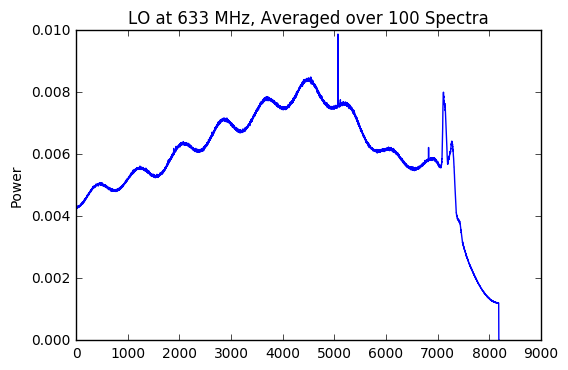

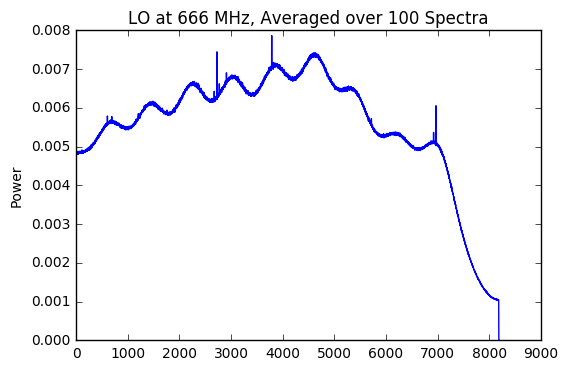

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in divide


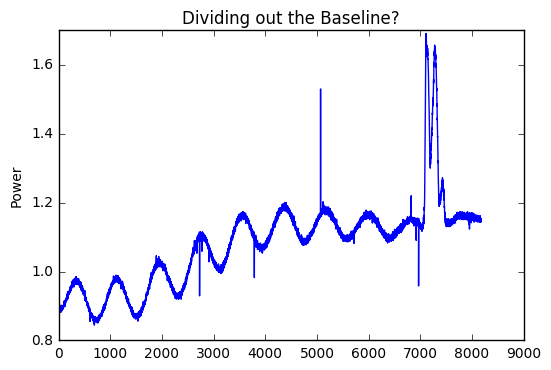

In [36]:
plt.plot(avg_spectrum(LO_633))
plt.title('LO at 633 MHz, Averaged over 100 Spectra')
plt.ylabel('Power')
plt.show()

plt.plot(avg_spectrum(LO_666))
plt.title('LO at 666 MHz, Averaged over 100 Spectra')
plt.ylabel('Power')
plt.show()

plt.plot(avg_spectrum(LO_633)/avg_spectrum(LO_666))
plt.title('Dividing out the Baseline?')
plt.ylabel('Power')
plt.show()

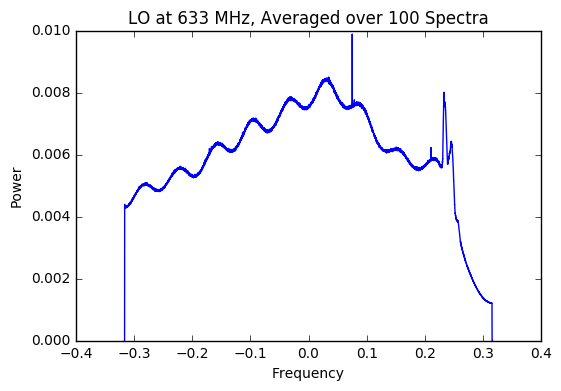

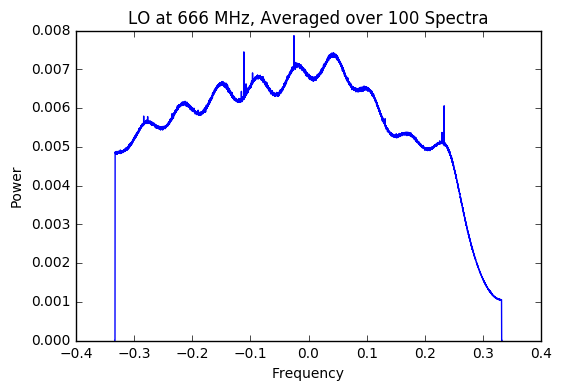

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:21: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in divide


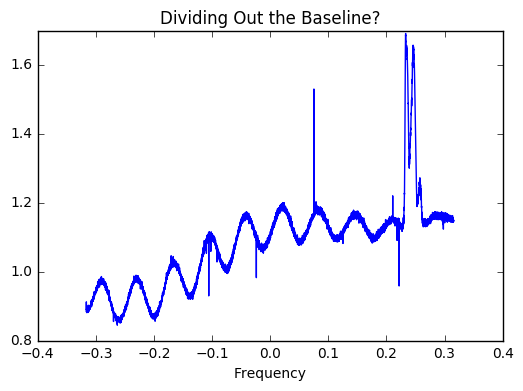

In [35]:
freq = np.fft.fftfreq(len(avg_spectrum(LO_633)), 1/.633)
data = avg_spectrum(LO_633)
plt.plot(freq[len(freq)/2:], data[:len(data)/2], 'b')
plt.plot(freq[:len(freq)/2], data[len(data)/2:], 'b')
plt.title('LO at 633 MHz, Averaged over 100 Spectra')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

freq2 = np.fft.fftfreq(len(avg_spectrum(LO_666)), 1/.666)
data2 = avg_spectrum(LO_666)
plt.plot(freq2[len(freq2)/2:], data2[:len(data2)/2], 'b')
plt.plot(freq2[:len(freq2)/2], data2[len(data2)/2:], 'b')
plt.title('LO at 666 MHz, Averaged over 100 Spectra')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

freq = np.fft.fftfreq(len(avg_spectrum(LO_633)), 1/.633)
data = avg_spectrum(LO_633)
plt.plot(freq[len(freq)/2:], data[:len(data)/2]/data2[:len(data)/2], 'b')
plt.plot(freq[:len(freq)/2], data[len(data)/2:]/data2[len(data)/2:], 'b')
plt.title('Dividing Out the Baseline?')
plt.xlabel('Frequency')
plt.show()

## Calibration Measurements

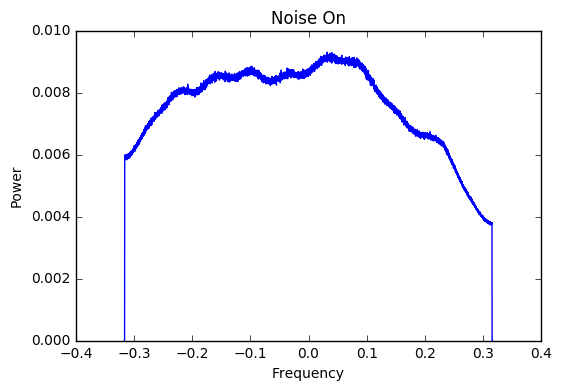

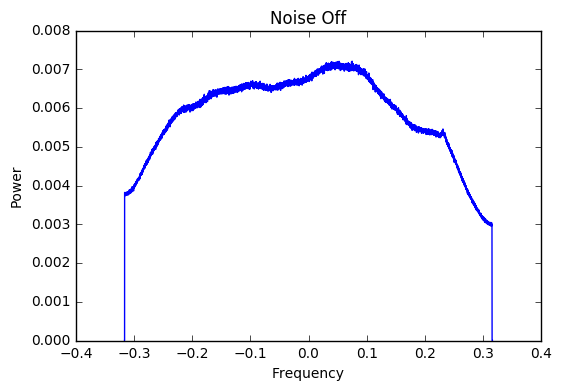

In [3]:
noise_on = avg_spectrum(pyfits.open('noise_on_apr26.fits'))
noise_off = avg_spectrum(pyfits.open('noise_off_apr26.fits'))

freq = np.fft.fftfreq(len(noise_on), 1/.633)
plt.plot(freq[len(freq)/2:], noise_on[:len(noise_on)/2], 'b')
plt.plot(freq[:len(freq)/2], noise_on[len(noise_on)/2:], 'b')
plt.title('Noise On')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

freq = np.fft.fftfreq(len(noise_off), 1/.633)
plt.plot(freq[len(freq)/2:], noise_off[:len(noise_off)/2], 'b')
plt.plot(freq[:len(freq)/2], noise_off[len(noise_off)/2:], 'b')
plt.title('Noise Off')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

In [4]:
noise_on_avg = sum(noise_on) / len(noise_on)
noise_off_avg = sum(noise_off) / len(noise_off)
gain = (noise_on_avg - noise_off_avg)/30 

In [5]:
print(gain)

5.7936986306812795e-05


In [4]:
diff = noise_on - noise_off
avg_diff = sum(diff) / len(diff)
gain_ = avg_diff/30

In [5]:
print(gain_)

5.7936986306812226e-05
